In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [7]:
#Load the dataset
data = pd.read_csv("Dataset_Day5.csv")

#Print the first 5 entries
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### a.	Missing Data Treatment

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
#Get names of columns with missing values

cols_with_missing = [col for col in data.columns if data[col].isna().sum()>0]
cols_with_missing

[]

In [10]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

#### There seems to be no missing values in Dataset_day5.

### b.	Descriptive Statistics of each variable

In [11]:
#Descriptive statistics for numeric columns
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### c. Visual Views

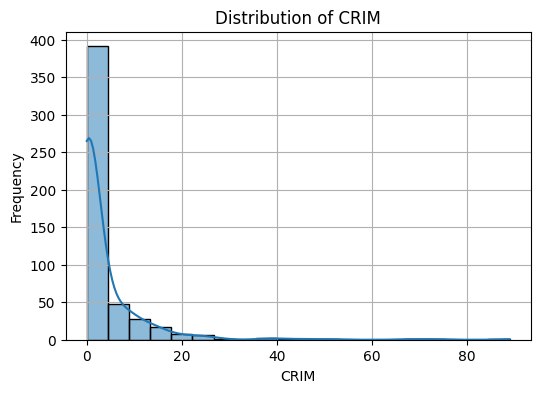

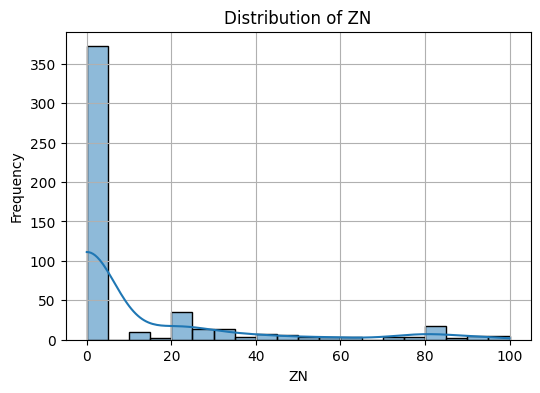

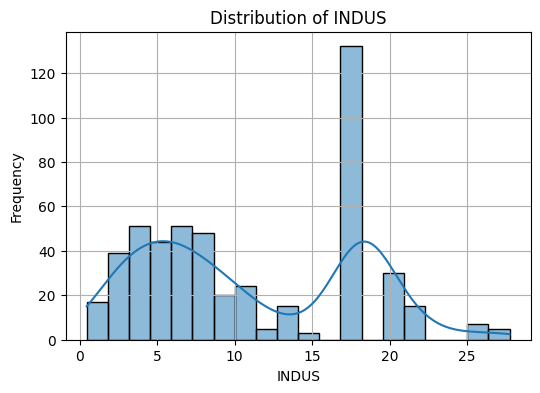

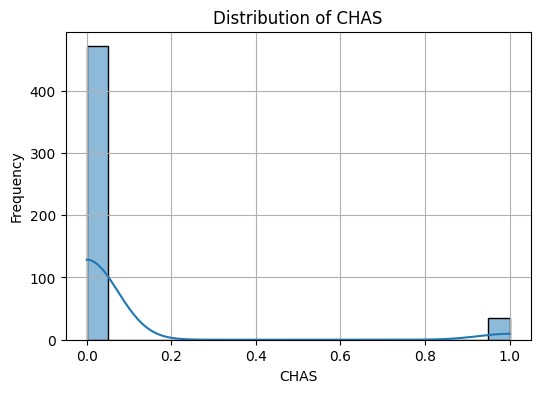

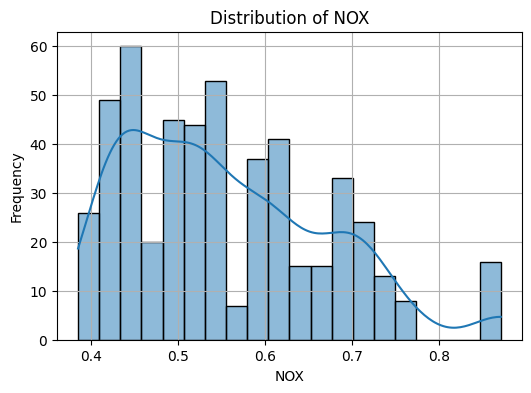

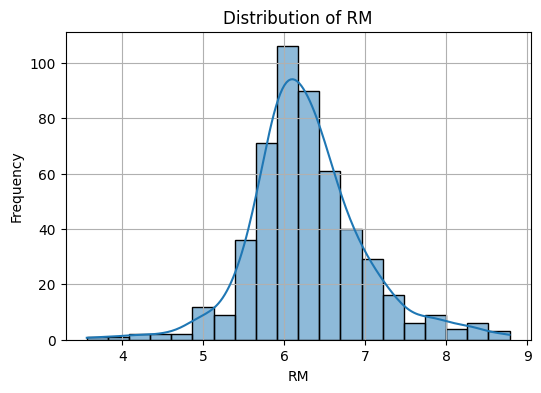

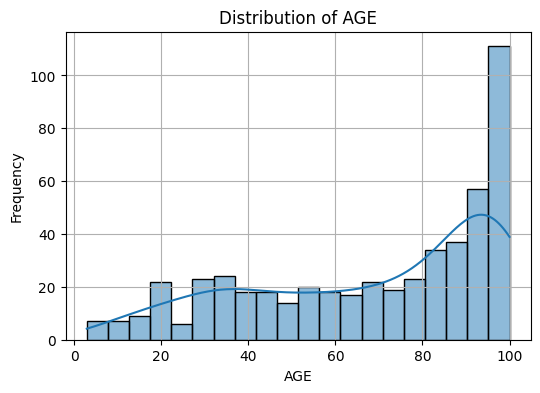

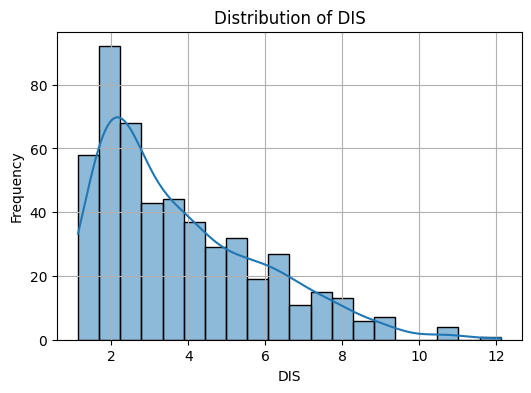

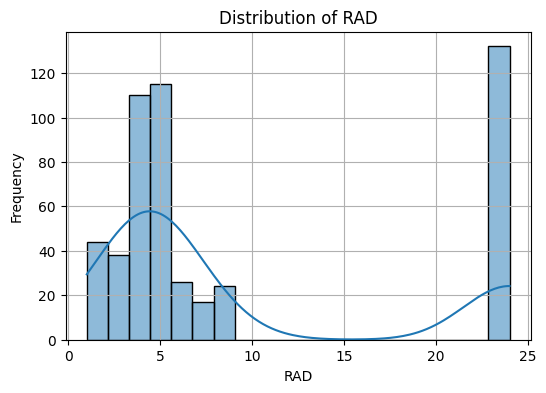

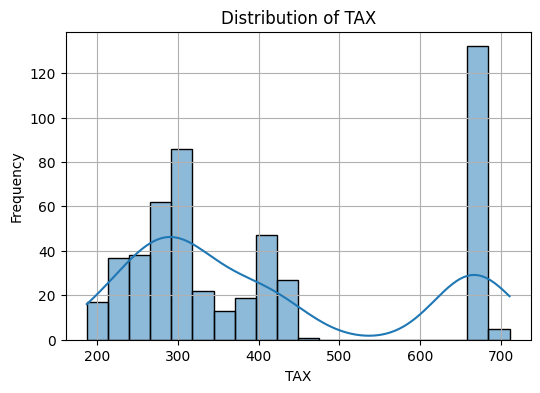

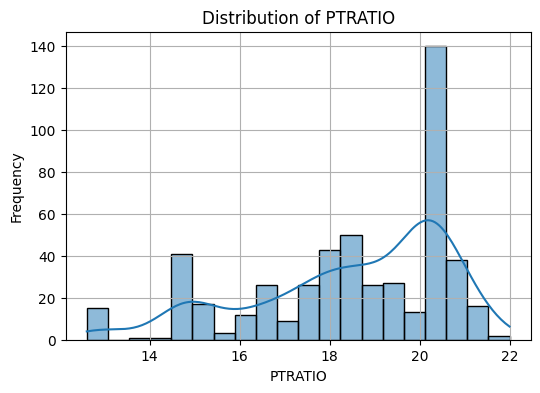

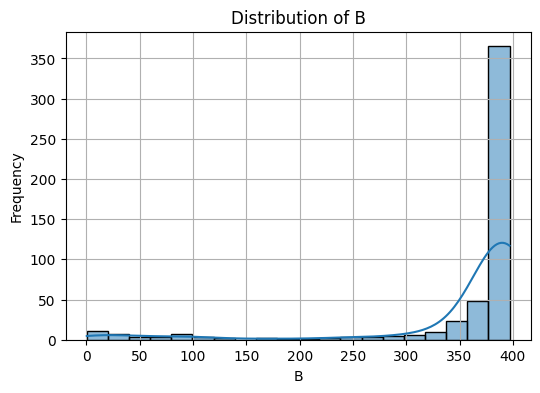

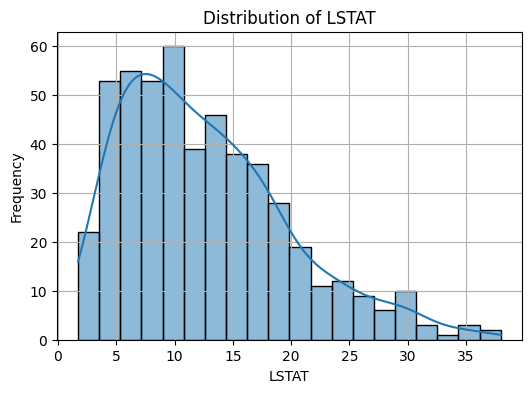

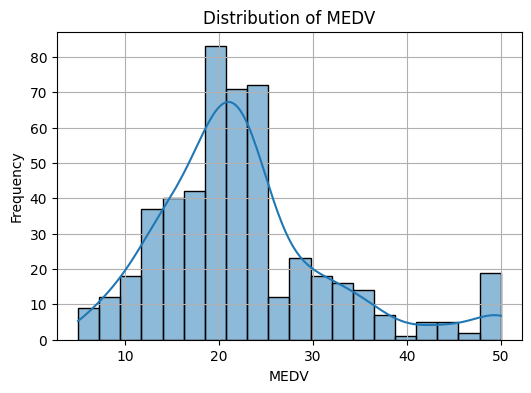

In [12]:
# Histograms for all continuous variables
for col in data.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

#### Observations:
##### 1. CRIM, ZN, INDUS, NOX, DIS, RAD, TAX, B, LSAT exhibit strong right skewness. 
##### 2. AGE is left skewed.
##### 3. RM and MEDV seems to be somewhat symmentric bell shaped.

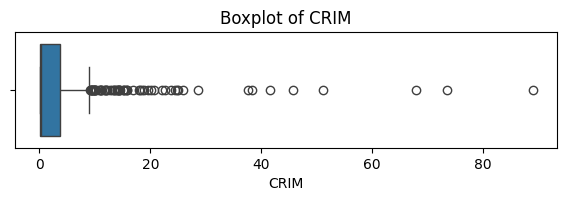

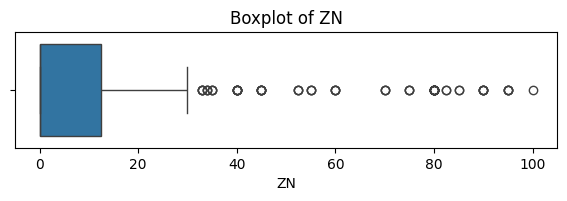

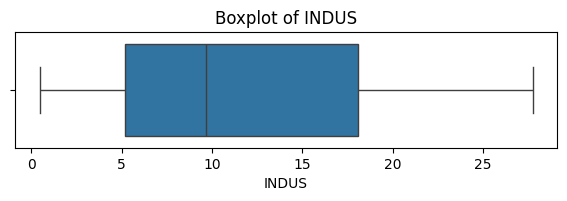

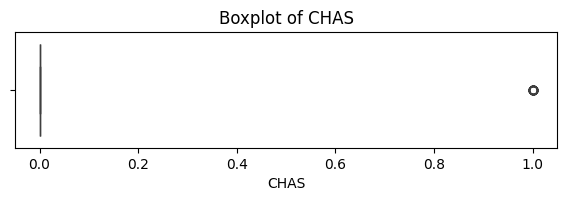

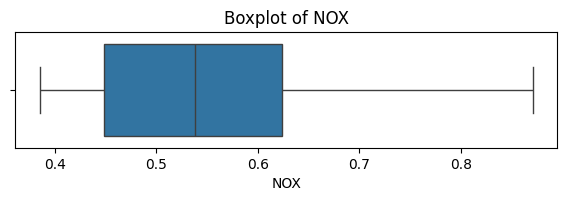

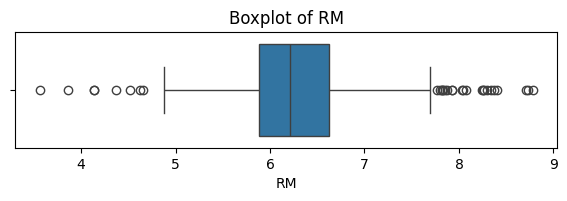

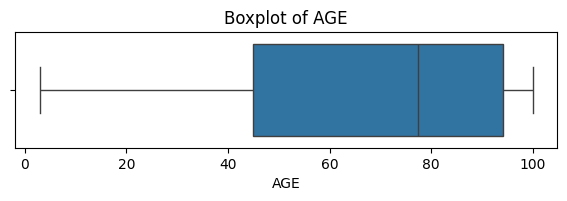

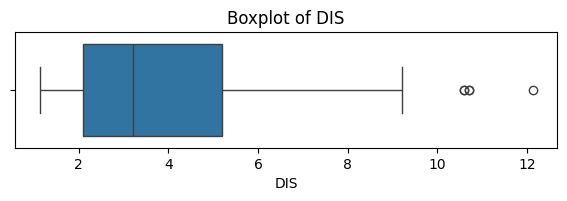

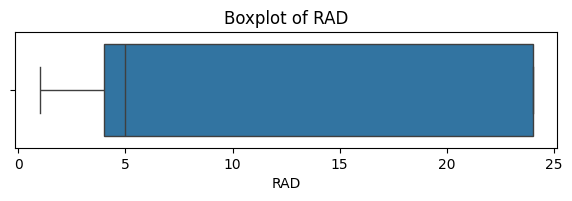

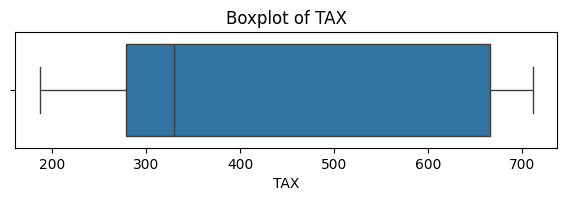

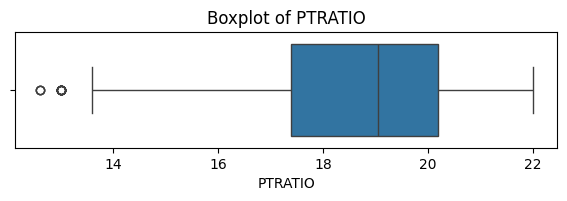

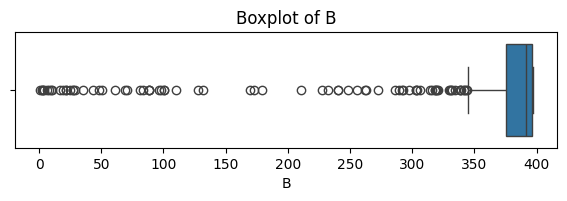

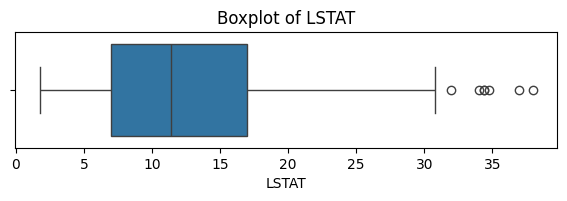

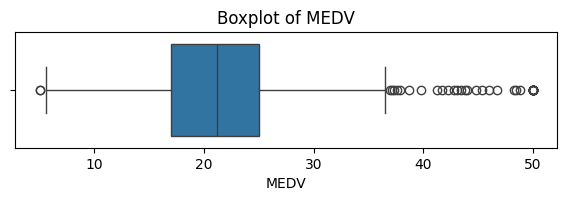

In [13]:
# Boxplots for all numerical columns
for col in data.select_dtypes(include=['float64', 'int']).columns:
    plt.figure(figsize=(7, 1.5))
    sns.boxplot(data=data, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

#### A significant no of outliers are present across almost all the variables.

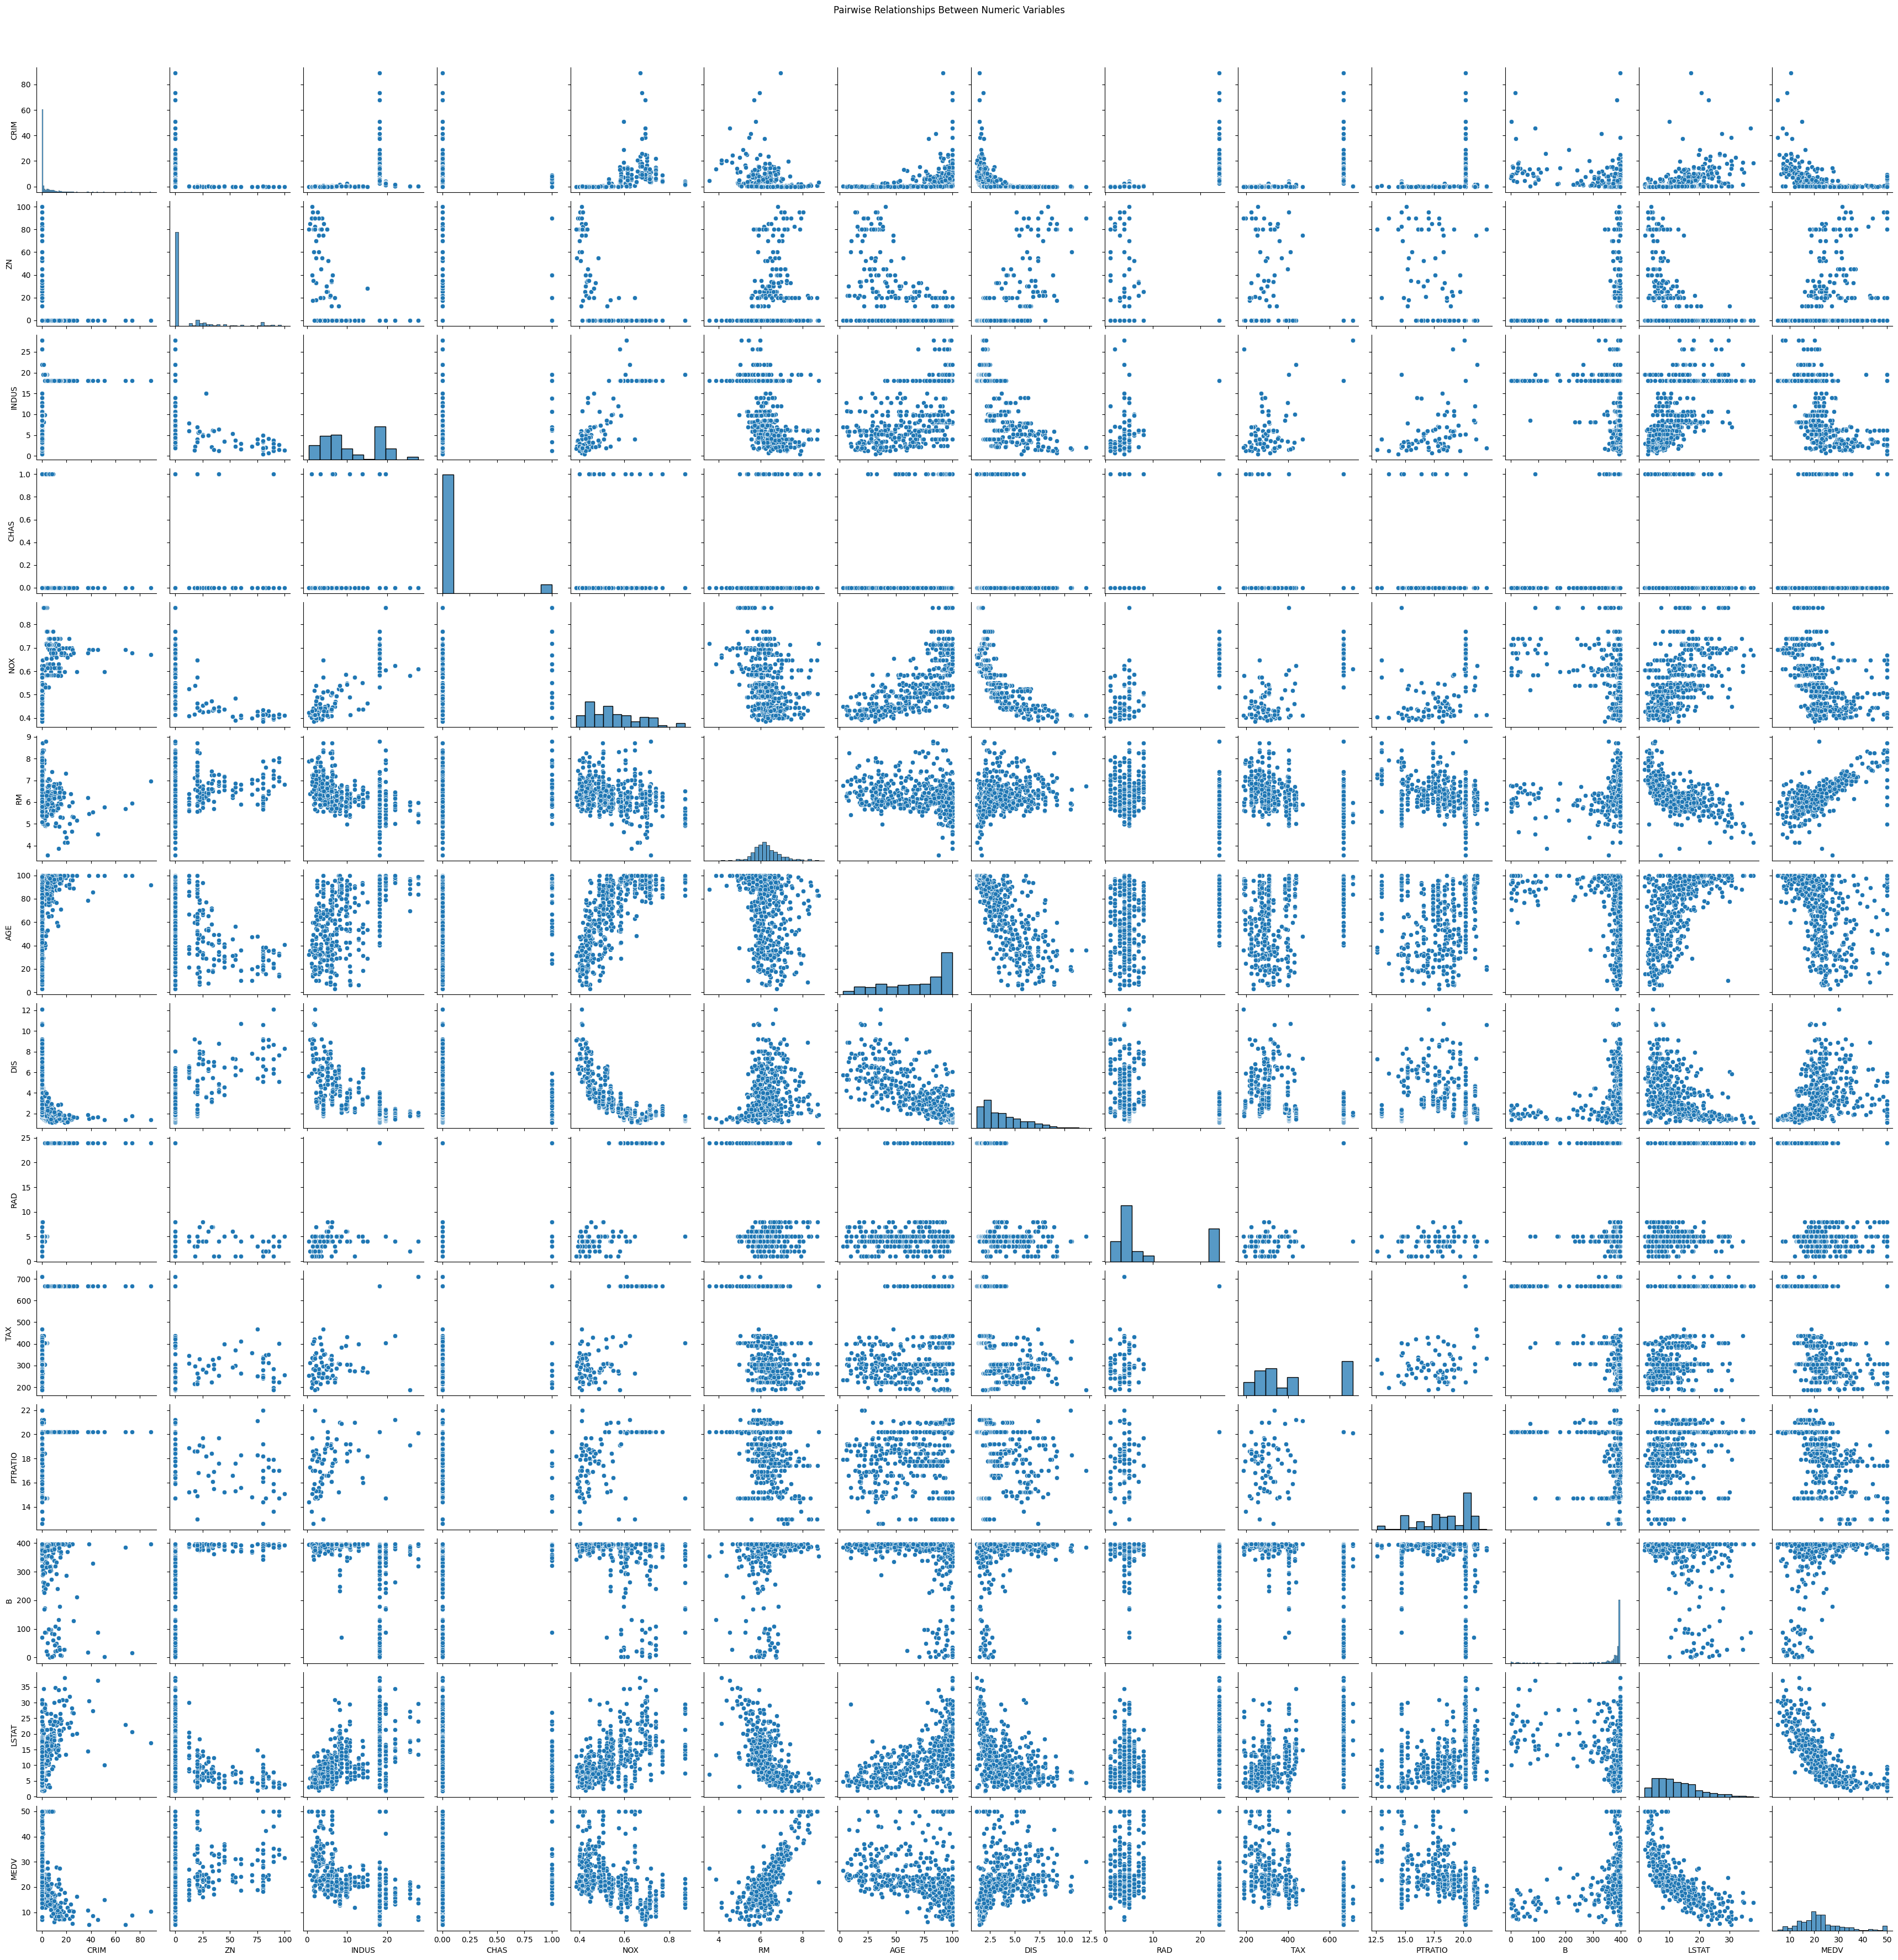

In [14]:
# Plot pairplot for all numeric columns

sns.pairplot(data.select_dtypes(include='number'))
plt.suptitle("Pairwise Relationships Between Numeric Variables", y=1.02)
plt.show()


### 2.	Create a simple linear regression model that quantitatively relates ‘MEDV’ with ‘RM’. 

In [15]:
# Define X and y
X = data[['RM']] # Predictor
y = data['MEDV'] # Target

# Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Build the model
model_rm = LinearRegression()
model_rm.fit(X_train, y_train)

print("Intercept:", model_rm.intercept_)
print("Coefficient:", model_rm.coef_)

print("Regression Model: MEDV = {:.2f} + {:.2f} * RM".format(model_rm.intercept_, model_rm.coef_[0]))


Intercept: -36.24631889813792
Coefficient: [9.34830141]
Regression Model: MEDV = -36.25 + 9.35 * RM


#### a.	Share the model performance metrics and print the full regression model with coefficients.

In [16]:
# Model performance

In [23]:
# Predict and evaluate
y_pred_rm = model_rm.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred_rm))
print("MAE:", mean_absolute_error(y_test, y_pred_rm))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rm)))


R² Score: 0.3707569232254778
MAE: 4.478335832064147
RMSE: 6.792994578778734


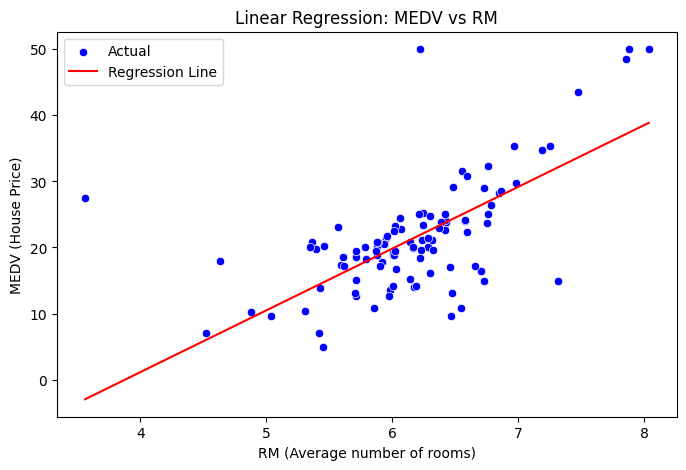

In [17]:

# Plot actual data points
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test['RM'], y=y_test, color='blue', label='Actual')

# Plot predicted line
y_pred = model_rm.predict(X_test)
sns.lineplot(x=X_test['RM'], y=y_pred, color='red', label='Regression Line')

plt.title("Linear Regression: MEDV vs RM")
plt.xlabel("RM (Average number of rooms)")
plt.ylabel("MEDV (House Price)")
plt.legend()
plt.show()


#### b.	Use the model to predict the price of the house for ‘RM’ = 7

In [19]:
predicted_price_rm7 = model_rm.predict([[7]])
print("Predicted MEDV for RM=7:", predicted_price_rm7[0])


Predicted MEDV for RM=7: 29.191790947346128


c:\Users\mukhe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### 3.	Create a simple linear regression model that quantitatively relates ‘MEDV’ with ‘DIS’

In [21]:
# Create second model
X2 = data[['DIS']]
y2 = data['MEDV']

# Split the data into test and train
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Build the model
model_dis = LinearRegression()
model_dis.fit(X2_train, y2_train)


print("Intercept:", model_dis.intercept_)
print("Coefficient:", model_dis.coef_)


print("Regression Model: MEDV = {:.2f} + {:.2f} * DIS".format(model_dis.intercept_, model_dis.coef_[0]))

Intercept: 18.875962058273238
Coefficient: [1.0295094]
Regression Model: MEDV = 18.88 + 1.03 * DIS


#### a.	Share the model performance metrics and print the full regression model with coefficients.

In [22]:
# Predict and evaluate
y_pred_dis = model_dis.predict(X2_test)
print("R² Score:", r2_score(y2_test, y_pred_dis))
print("MAE:", mean_absolute_error(y2_test, y_pred_dis))
print("RMSE:", np.sqrt(mean_squared_error(y2_test, y_pred_dis)))

R² Score: 0.07332042069244615
MAE: 5.967846118518974
RMSE: 8.243598687954155


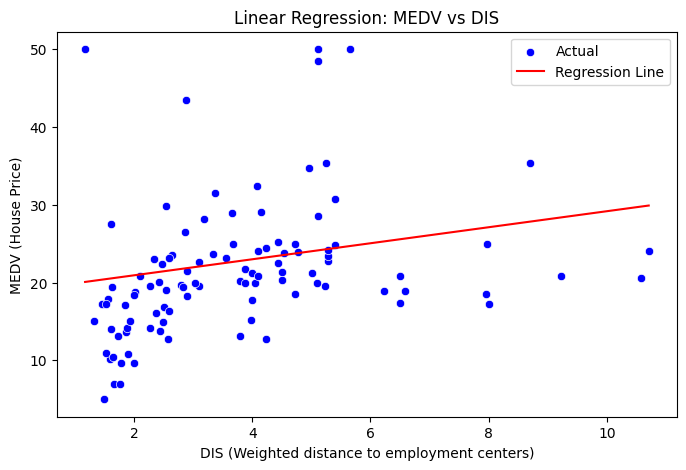

In [23]:
# Plot actual data points
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X2_test['DIS'], y=y_test, color='blue', label='Actual')

# Plot predicted line
y_pred = model_dis.predict(X2_test)
sns.lineplot(x=X2_test['DIS'], y=y_pred, color='red', label='Regression Line')

plt.title("Linear Regression: MEDV vs DIS")
plt.xlabel("DIS (Weighted distance to employment centers)")
plt.ylabel("MEDV (House Price)")
plt.legend()
plt.show()

#### b.	Use the model to predict the price of the house for ‘DIS’ = 15

In [24]:
predicted_price_dis15 = model_dis.predict([[15]])
print("Predicted MEDV for DIS=15:", predicted_price_dis15[0])


Predicted MEDV for DIS=15: 34.31860303737079


c:\Users\mukhe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [29]:
import pickle
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor

# Define X and y
X = data[['RM', 'DIS']] # Predictor
y = data['MEDV'] # Target

# Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Train the final model (Extra Trees)
final_model = ExtraTreesRegressor()
final_model.fit(X_train, y_train)

# Save the model
pickle.dump(final_model, open("model.pkl", "wb"))
